## Step 1: Reading and Understanding the Data

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [190]:
# Read the data
bikeDF = pd.read_csv("day.csv")

In [191]:
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [192]:
bikeDF.shape

(730, 16)

In [193]:
# This has 730 rows and 16 columns
# Lets look for missing values for the columns
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [194]:
# None of the columns have missing values, hence we will not have to impute

In [195]:
# Lets looks at the statistical summary of the numerical variable in this data set
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [196]:
# Now lets look at the data dictonary and identify the columns that can be dropped

In [197]:
# instant is record index, hence can be dropped
# Since we have yr and mnth separately, dteday can be dropped
# Since cnt = casual + registered, and cnt is our tagret variable, we can drop casual and registered
bikeDF.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [198]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [199]:
# After dropping the redundant columns, lets visualize the continuous numerical variables

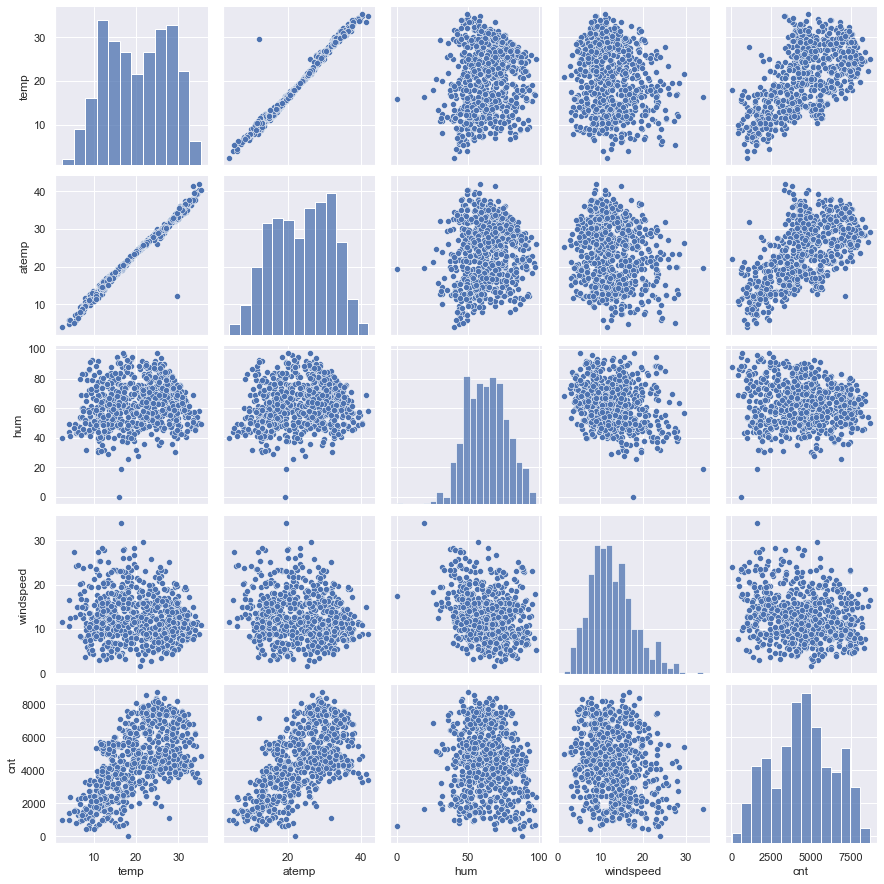

In [200]:
sns.set(font_scale=1)
sns.pairplot(bikeDF, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [201]:
# As we can see that there are some independent variables that are positively correlated with cnt, hence Multiple Linear Regression can be applied  

In [202]:
# After visualizing the numerical variables, lets visualize the categorical variables as well using box plot

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

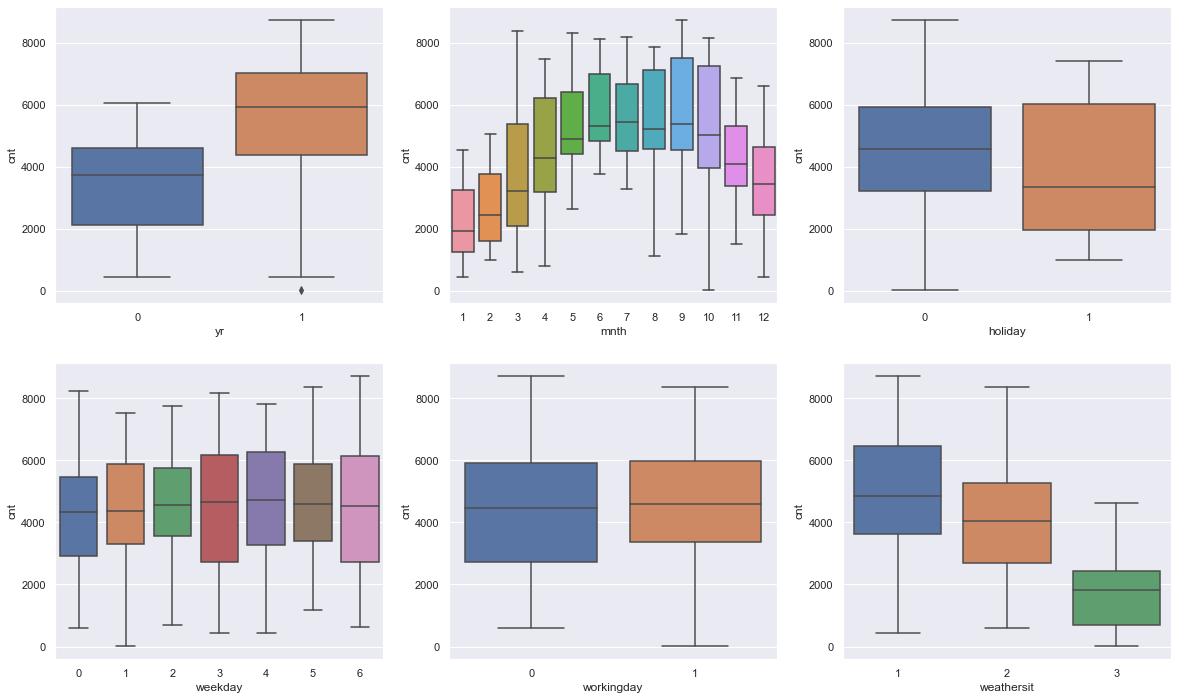

In [203]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="yr", y="cnt", data=bikeDF)

plt.subplot(2,3,2)
sns.boxplot(x="mnth", y="cnt", data=bikeDF)

plt.subplot(2,3,3)
sns.boxplot(x="holiday", y="cnt", data=bikeDF)

plt.subplot(2,3,4)
sns.boxplot(x="weekday", y="cnt", data=bikeDF)

plt.subplot(2,3,5)
sns.boxplot(x="workingday", y="cnt", data=bikeDF)

plt.subplot(2,3,6)
sns.boxplot(x="weathersit", y="cnt", data=bikeDF)

In [204]:
# Observations from analysis of box plots for categorical variables
# The use of bikes seems to grow in 2019, as compared to 2018
# The use of bikes seems to be higher in months May till October
# The use of bikes seems to be higher on non-holidays
# Weekday doesnt seem to have much impact on the demand of bikes
# Working day doesnt seem to have much impact on the demand of bikes
# Weather situation seems to impact the demand of bikes, with less demand in category 3 and 4

## Step 2: Preparing the data for Modeling
    - Encoding:
        - Converting binary variables to 0/1
        - creating dummy variables
    - Splitting into train and test
    - Rescaling of variables

In [205]:
bikeDF.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [206]:
bikeDF.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [207]:
bikeDF.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [208]:
bikeDF.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [209]:
bikeDF.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [210]:
bikeDF.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [211]:
# Since we dont have variables that contain "Yes" and "No" as values, we dont need to convert them to 1/0

In [212]:
# Creating Dummy variables

In [213]:
seasonDF = pd.get_dummies(bikeDF['season'],drop_first=True)
weekdayDF = pd.get_dummies(bikeDF['weekday'],drop_first=True)
weathersitDF = pd.get_dummies(bikeDF['weathersit'],drop_first=True)
monthDF = pd.get_dummies(bikeDF['mnth'],drop_first=True)

In [214]:
# concat the dummy Dataframe with original dataframe

In [215]:
bikeDF = pd.concat([bikeDF, seasonDF, weekdayDF, weathersitDF, monthDF], axis=1)

In [216]:
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,3,4,5,6,7,8,9,10,11,12
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# After Encoding, the original variables can be dropped
bikeDF.drop(['season', 'weekday', 'weathersit','mnth'],axis=1,inplace=True)

In [218]:
bikeDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
# Splitting the data set into train and test

In [220]:
bike_train, bike_test = train_test_split(bikeDF, train_size=0.8, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(584, 30)
(146, 30)


In [221]:
# Rescaling of variables
## using MinMax scaling, as it takes care of outliers

In [222]:
scaler = MinMaxScaler()
numeric_vars=['temp','atemp','hum','windspeed','cnt']
bike_train[numeric_vars] = scaler.fit_transform(bike_train[numeric_vars])

In [223]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,3,4,5,6,7,8,9,10,11,12
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Training the Model

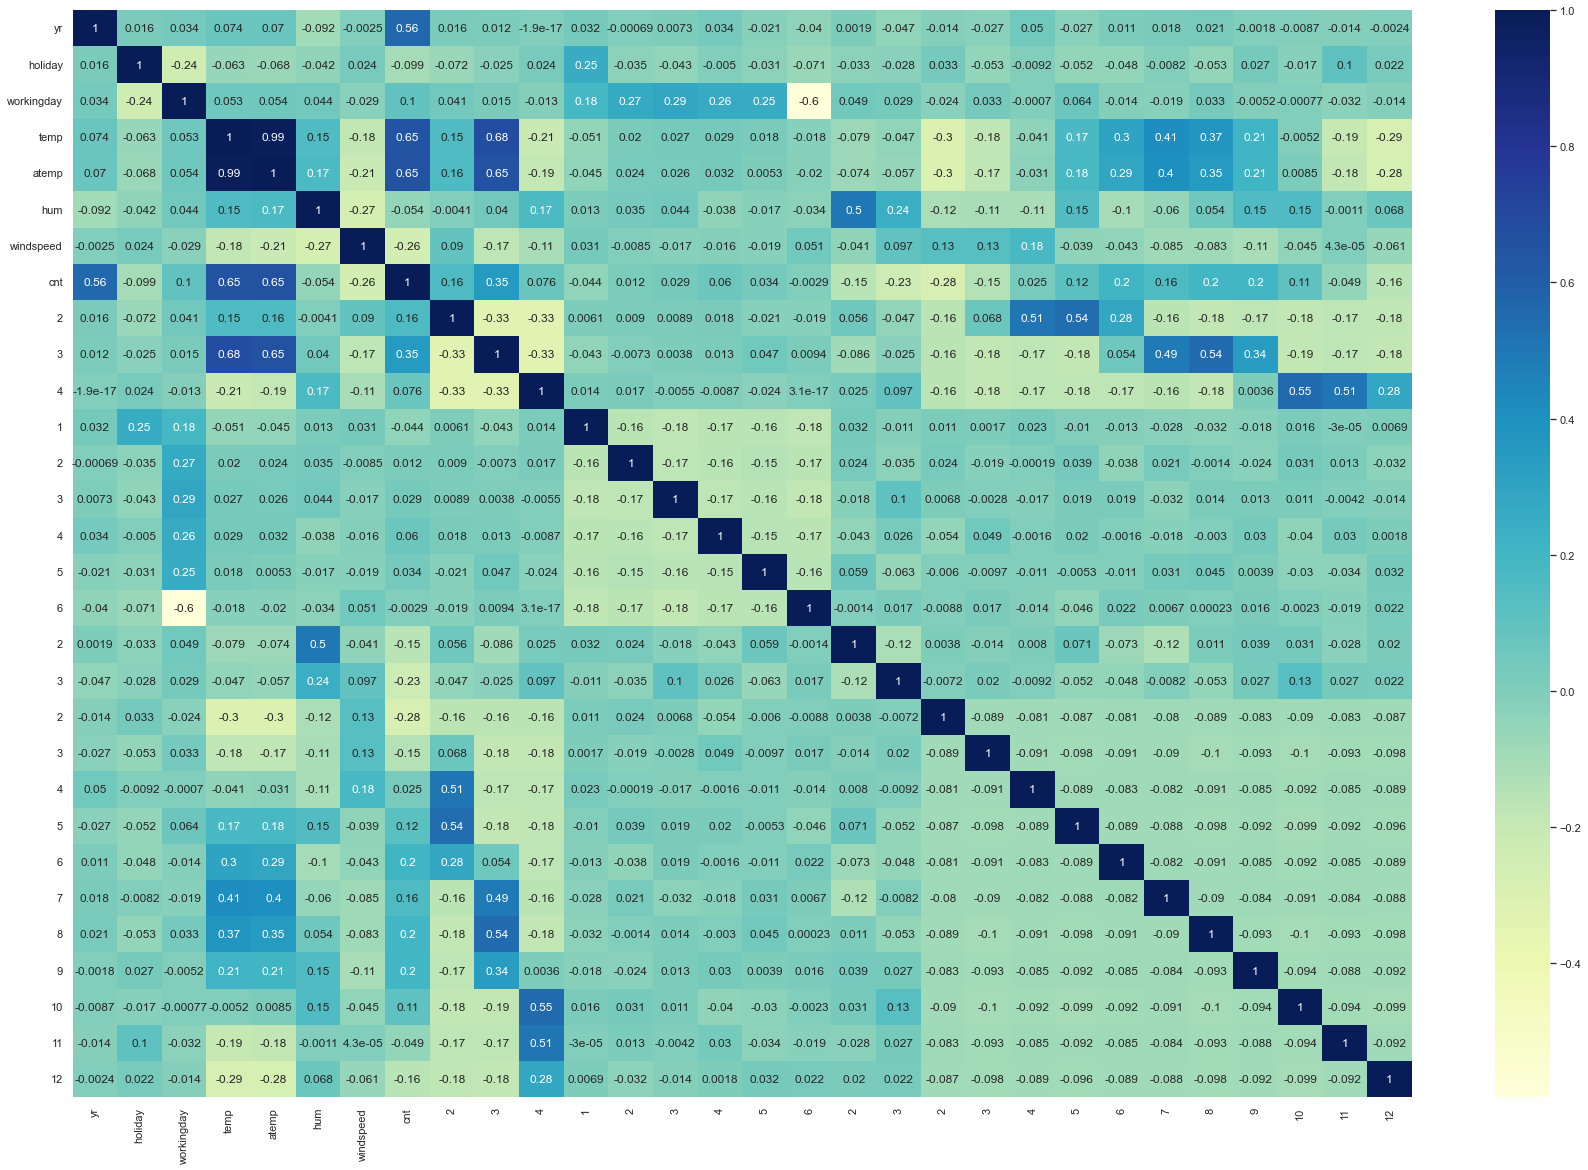

In [224]:
# Making a heatmap to see which variables are correlated
plt.figure(figsize=(30,20))
sns.heatmap(bike_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [225]:
# splitting the train data into target variable ("cnt") and independent variables
y_train = bike_train.pop('cnt')
x_train = bike_train

In [226]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,4,...,3,4,5,6,7,8,9,10,11,12
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
# Building a model with just 1 variable. We will add variables till we see a positive impact on the R Squared value
x_train_sm = sm.add_constant(x_train["yr"])
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.385545
yr       0.253549
dtype: float64

In [228]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.13e-50
Time:                        11:18:52   Log-Likelihood:                 153.35
No. Observations:                 584   AIC:                            -302.7
Df Residuals:                     582   BIC:                            -294.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3855      0.011     34.855      0.000       0.364       0.407
yr             0.2535      0.015     16.429      0.000       0.223       0.284
==============================================================================
Omnibus:                       35.168   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.604
Skew:                          -0.607   Prob(JB):                     4.14e-09
Kurtosis:                       2.662   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# the p-value is zero, which means that the variable is statistically significant
# We also looked at R Squared, which is 0.317. 
# Now we will look at adding another variable to observe the impact on p values and R Squared value
# However, with a large number of variables, this will become a very tedious exercise
# Hence we will apply another technique of adding all variables

In [230]:
bikeDF.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',            2,            3,
                  4,            1,            2,            3,            4,
                  5,            6,            2,            3,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12],
      dtype='object')

In [231]:
# Adding all variables to the model

In [232]:
x_train_sm = sm.add_constant(bike_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.26e-215
Time:                        11:18:52   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1624      0.028      5.790      0.000       0.107       0.217
yr             0.2293      0.007     31.082      0.000       0.215       0.244
holiday       -0.0417      0.021     -2.013      0.045      -0.082      -0.001
workingday     0.0494      0.008      5.933      0.000       0.033       0.066
temp           0.3825      0.135      2.828      0.005       0.117       0.648
atemp          0.0680      0.133      0.510      0.610      -0.194       0.330
hum           -0.1444      0.036     -3.993      0.000      -0.215      -0.073
windspeed     -0.1789      0.024     -7.352      0.000      -0.227      -0.131
2              0.0978      0.022      4.366      0.000       0.054       0.142
3              0.0564      0.027      2.068      0.039       0.003       0.110
4              0.1646      0.023      7.225      0.000       0.120       0.209
1             -0.0101      0.009     -1.127      0.260      -0.028       0.007
2             -0.0086      0.010     -0.858      0.391      -0.028       0.011
3              0.0071      0.010      0.748      0.455      -0.012       0.026
4              0.0046      0.010      0.461      0.645      -0.015       0.024
5              0.0146      0.010      1.417      0.157      -0.006       0.035
6              0.0605      0.013      4.616      0.000       0.035       0.086
2             -0.0592      0.010     -6.127      0.000      -0.078      -0.040
3             -0.2625      0.025    -10.458      0.000      -0.312      -0.213
2              0.0300      0.018      1.628      0.104      -0.006       0.066
3              0.0616      0.021      2.987      0.003       0.021       0.102
4              0.0587      0.031      1.875      0.061      -0.003       0.120
5              0.0776      0.034      2.310      0.021       0.012       0.144
6              0.0692      0.036      1.947      0.052      -0.001       0.139
7              0.0249      0.040      0.627      0.531      -0.053       0.103
8              0.0773      0.038      2.037      0.042       0.003       0.152
9              0.1366      0.034      4.067      0.000       0.071       0.203
10             0.0719      0.030      2.359      0.019       0.012       0.132
11             0.0085      0.029      0.290      0.772      -0.049       0.066
12             0.0068      0.023      0.296      0.767      -0.038       0.052
==============================================================================
Omnibus:                      106.744   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.955
Skew:                          -0.888   Prob(JB):                     6.02e-67
Kurtosis:                       6.062   Cond. No.                     2.25e+15
==============================================================================

N

In [233]:
# p value of atemp and some dummy variables is very high. We have taken into consideration that p value greater than 0.05 is considered to be high.

In [234]:
# since the p value of some variables is very high, we can look at dropping them. 
# But before we drop variables, lets look at the VIF

In [235]:
# lets create a dataframe that will contain the name of the variables and the VIFs

In [236]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by="VIF", ascending = False)
vif

,Features,VIF
14,5,inf
10,1,inf
1,holiday,inf
13,4,inf
12,3,inf
11,2,inf
2,workingday,inf
3,temp,480.91
4,atemp,423.70
5,hum,20.89


In [237]:
# now lets look at both VIF and the p values.
# atemp has a very high p value and also has a high VIF
# so lets drop atemp and then re-render the model and observe the impact on the p values and VIFs

In [238]:
x = x_train.drop("atemp", axis=1)

In [239]:
# now lets re-render the model

In [240]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.29e-216
Time:                        11:18:53   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1628      0.028      5.814      0.000       0.108       0.218
yr             0.2292      0.007     31.107      0.000       0.215       0.244
holiday       -0.0424      0.021     -2.051      0.041      -0.083      -0.002
workingday     0.0495      0.008      5.951      0.000       0.033       0.066
temp           0.4480      0.042     10.610      0.000       0.365       0.531
hum           -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed     -0.1816      0.024     -7.654      0.000      -0.228      -0.135
2              0.0979      0.022      4.374      0.000       0.054       0.142
3              0.0558      0.027      2.051      0.041       0.002       0.109
4              0.1648      0.023      7.237      0.000       0.120       0.209
1             -0.0099      0.009     -1.111      0.267      -0.027       0.008
2             -0.0086      0.010     -0.861      0.390      -0.028       0.011
3              0.0070      0.010      0.734      0.463      -0.012       0.026
4              0.0046      0.010      0.462      0.645      -0.015       0.024
5              0.0141      0.010      1.371      0.171      -0.006       0.034
6              0.0606      0.013      4.620      0.000       0.035       0.086
2             -0.0593      0.010     -6.144      0.000      -0.078      -0.040
3             -0.2636      0.025    -10.548      0.000      -0.313      -0.215
2              0.0303      0.018      1.646      0.100      -0.006       0.067
3              0.0618      0.021      2.996      0.003       0.021       0.102
4              0.0592      0.031      1.893      0.059      -0.002       0.121
5              0.0772      0.034      2.298      0.022       0.011       0.143
6              0.0682      0.035      1.923      0.055      -0.001       0.138
7              0.0242      0.040      0.609      0.543      -0.054       0.102
8              0.0758      0.038      2.004      0.046       0.002       0.150
9              0.1362      0.034      4.058      0.000       0.070       0.202
10             0.0720      0.030      2.364      0.018       0.012       0.132
11             0.0087      0.029      0.299      0.765      -0.049       0.066
12             0.0071      0.023      0.311      0.756      -0.038       0.052
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [241]:
vif = pd.DataFrame()
vif["Features"] = x_train_sm.columns
vif["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range (x_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by="VIF", ascending = False)
vif

,Features,VIF
14,5,inf
10,1,inf
2,holiday,inf
3,workingday,inf
13,4,inf
12,3,inf
11,2,inf
0,const,60.81
8,3,10.82
24,8,9.15


In [242]:
# we observe that some dummy variables have  high p value and high VIF as well viz 4, 7, 11, 12
# so lets drop these variables

In [243]:
x_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       584 non-null    float64
 1   yr          584 non-null    int64  
 2   holiday     584 non-null    int64  
 3   workingday  584 non-null    int64  
 4   temp        584 non-null    float64
 5   hum         584 non-null    float64
 6   windspeed   584 non-null    float64
 7   2           584 non-null    uint8  
 8   3           584 non-null    uint8  
 9   4           584 non-null    uint8  
 10  1           584 non-null    uint8  
 11  2           584 non-null    uint8  
 12  3           584 non-null    uint8  
 13  4           584 non-null    uint8  
 14  5           584 non-null    uint8  
 15  6           584 non-null    uint8  
 16  2           584 non-null    uint8  
 17  3           584 non-null    uint8  
 18  2           584 non-null    uint8  
 19  3           584 non-null   

In [244]:
x = x_train_sm.drop(x_train_sm.columns[[13, 23,27, 28]], axis=1)

In [245]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.14e-195
Time:                        11:18:53   Log-Likelihood:                 549.18
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     561   BIC:                            -951.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2176      0.030      7.219      0.000       0.158       0.277
yr             0.2266      0.008     27.779      0.000       0.211       0.243
holiday       -0.0498      0.029     -1.715      0.087      -0.107       0.007
workingday     0.0560      0.015      3.733      0.000       0.027       0.085
temp           0.5825      0.036     16.314      0.000       0.512       0.653
hum           -0.1378      0.039     -3.511      0.000      -0.215      -0.061
windspeed     -0.2039      0.026     -7.833      0.000      -0.255      -0.153
2              0.0413      0.015      2.819      0.005       0.013       0.070
3             -0.0798      0.020     -3.976      0.000      -0.119      -0.040
1             -0.0143      0.015     -0.938      0.349      -0.044       0.016
2             -0.0133      0.016     -0.855      0.393      -0.044       0.017
3             -0.0005      0.015     -0.036      0.971      -0.030       0.029
5              0.0083      0.016      0.527      0.598      -0.023       0.039
6              0.0615      0.015      4.234      0.000       0.033       0.090
2             -0.0612      0.011     -5.731      0.000      -0.082      -0.040
3             -0.2516      0.028     -9.101      0.000      -0.306      -0.197
2             -0.0576      0.017     -3.440      0.001      -0.090      -0.025
3             -0.0236      0.015     -1.565      0.118      -0.053       0.006
5             -0.0064      0.019     -0.335      0.738      -0.044       0.031
6             -0.0030      0.019     -0.161      0.872      -0.040       0.034
8              0.0520      0.018      2.833      0.005       0.016       0.088
9              0.1337      0.017      7.692      0.000       0.100       0.168
10             0.1130      0.017      6.766      0.000       0.080       0.146
==============================================================================
Omnibus:                       42.610   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.515
Skew:                          -0.564   Prob(JB):                     7.23e-14
Kurtosis:                       4.101   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
vif = pd.DataFrame()
vif["Features"] = x_train_sm.columns
vif["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range (x_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by="VIF", ascending = False)
vif

,Features,VIF
0,const,57.11
8,3,4.77
4,temp,4.06
3,workingday,3.14
7,2,2.51
5,hum,2.01
9,1,1.86
18,5,1.84
11,3,1.83
10,2,1.75


In [247]:
x_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       584 non-null    float64
 1   yr          584 non-null    int64  
 2   holiday     584 non-null    int64  
 3   workingday  584 non-null    int64  
 4   temp        584 non-null    float64
 5   hum         584 non-null    float64
 6   windspeed   584 non-null    float64
 7   2           584 non-null    uint8  
 8   3           584 non-null    uint8  
 9   1           584 non-null    uint8  
 10  2           584 non-null    uint8  
 11  3           584 non-null    uint8  
 12  5           584 non-null    uint8  
 13  6           584 non-null    uint8  
 14  2           584 non-null    uint8  
 15  3           584 non-null    uint8  
 16  2           584 non-null    uint8  
 17  3           584 non-null    uint8  
 18  5           584 non-null    uint8  
 19  6           584 non-null   

In [248]:
# since the p values for dummy variables 3, 5, 5, 6 is very high, lets drop them

In [249]:
x = x_train_sm.drop(x_train_sm.columns[[11, 12, 18, 19]], axis=1)

In [250]:
# re-rendering the model

In [251]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.84e-179
Time:                        11:18:54   Log-Likelihood:                 490.37
No. Observations:                 584   AIC:                            -950.7
Df Residuals:                     569   BIC:                            -885.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.030     11.179      0.000       0.275       0.392
yr             0.2285      0.009     25.739      0.000       0.211       0.246
holiday       -0.0692      0.029     -2.354      0.019      -0.127      -0.011
workingday     0.0229      0.011      2.185      0.029       0.002       0.044
temp           0.5093      0.024     20.847      0.000       0.461       0.557
hum           -0.2582      0.038     -6.739      0.000      -0.333      -0.183
windspeed     -0.2490      0.028     -8.968      0.000      -0.304      -0.194
2              0.0722      0.012      6.110      0.000       0.049       0.095
1             -0.0135      0.014     -0.987      0.324      -0.040       0.013
2             -0.0076      0.014     -0.549      0.583      -0.035       0.020
2             -0.0294      0.011     -2.676      0.008      -0.051      -0.008
2             -0.0505      0.018     -2.805      0.005      -0.086      -0.015
8              0.0300      0.018      1.652      0.099      -0.006       0.066
9              0.1171      0.018      6.490      0.000       0.082       0.152
10             0.1308      0.016      8.019      0.000       0.099       0.163
==============================================================================
Omnibus:                       76.309   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.089
Skew:                          -0.769   Prob(JB):                     1.15e-32
Kurtosis:                       4.919   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
vif = pd.DataFrame()
vif["Features"] = x_train_sm.columns
vif["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range (x_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by="VIF", ascending = False)
vif

,Features,VIF
0,const,46.31
5,hum,1.59
4,temp,1.58
10,2,1.42
12,8,1.42
7,2,1.35
3,workingday,1.27
13,9,1.25
8,1,1.23
2,holiday,1.20


In [253]:
# while the VIF for constant is high, we are not dropping constant

In [254]:
# So this is our final model which has a R squared of 78.5%

## Step 4: Residual Analysis

<AxesSubplot:ylabel='Density'>

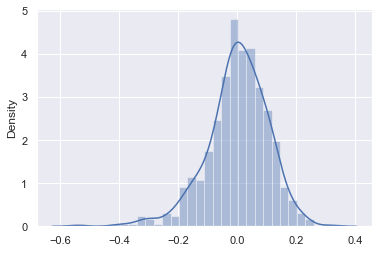

In [255]:
y_train_pred = lr_model.predict(x_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [256]:
# distribution seems to be centered around zero and looks to be normal

## Step 5: Predictions and Evaluations on the test set

In [257]:
# Before we can do the prediction, we will have to do the same transformation on the test set that we did on the training set

In [258]:
# The only difference is that we will not "fit" on the test set. We will only "transform"

In [259]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']
bike_test[numeric_vars] = scaler.transform(bike_test[numeric_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,1,0,0,0,0,0,0


In [260]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,3,4,5,6,7,8,9,10,11,12
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368,0.273973,0.280822,...,0.061644,0.102740,0.075342,0.102740,0.123288,0.061644,0.089041,0.054795,0.089041,0.075342
std,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757,0.447530,0.450948,...,0.241335,0.304664,0.264852,0.304664,0.329899,0.241335,0.285783,0.228362,0.285783,0.264852
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
# now lets make a prediction. But first, we must pop the cnt as that is going to be a predicted value

In [262]:
y_test = bike_test.pop("cnt")
x_test = bike_test

In [263]:
# add a constant to x test to make predictions

In [265]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,...,3,4,5,6,7,8,9,10,11,12
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,...,0,0,0,1,0,0,0,0,0,0


In [271]:
# Before we predict, lets remove the columns that were deleted from training set

In [273]:
x_test_sm = x_test_sm.drop(["atemp"], axis=1)

In [274]:
x_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       146 non-null    float64
 1   yr          146 non-null    int64  
 2   holiday     146 non-null    int64  
 3   workingday  146 non-null    int64  
 4   temp        146 non-null    float64
 5   hum         146 non-null    float64
 6   windspeed   146 non-null    float64
 7   2           146 non-null    uint8  
 8   3           146 non-null    uint8  
 9   4           146 non-null    uint8  
 10  1           146 non-null    uint8  
 11  2           146 non-null    uint8  
 12  3           146 non-null    uint8  
 13  4           146 non-null    uint8  
 14  5           146 non-null    uint8  
 15  6           146 non-null    uint8  
 16  2           146 non-null    uint8  
 17  3           146 non-null    uint8  
 18  2           146 non-null    uint8  
 19  3           146 non-null   

In [275]:
x_test_sm = x_test_sm.drop(x_test_sm.columns[[13, 23, 27, 28]], axis=1)

In [276]:
x_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       146 non-null    float64
 1   yr          146 non-null    int64  
 2   holiday     146 non-null    int64  
 3   workingday  146 non-null    int64  
 4   temp        146 non-null    float64
 5   hum         146 non-null    float64
 6   windspeed   146 non-null    float64
 7   2           146 non-null    uint8  
 8   3           146 non-null    uint8  
 9   1           146 non-null    uint8  
 10  2           146 non-null    uint8  
 11  3           146 non-null    uint8  
 12  5           146 non-null    uint8  
 13  6           146 non-null    uint8  
 14  2           146 non-null    uint8  
 15  3           146 non-null    uint8  
 16  2           146 non-null    uint8  
 17  3           146 non-null    uint8  
 18  5           146 non-null    uint8  
 19  6           146 non-null   

In [277]:
x_test_sm = x_test_sm.drop(x_test_sm.columns[[11, 12, 18, 19]], axis=1)

In [278]:
x_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       146 non-null    float64
 1   yr          146 non-null    int64  
 2   holiday     146 non-null    int64  
 3   workingday  146 non-null    int64  
 4   temp        146 non-null    float64
 5   hum         146 non-null    float64
 6   windspeed   146 non-null    float64
 7   2           146 non-null    uint8  
 8   1           146 non-null    uint8  
 9   2           146 non-null    uint8  
 10  2           146 non-null    uint8  
 11  2           146 non-null    uint8  
 12  8           146 non-null    uint8  
 13  9           146 non-null    uint8  
 14  10          146 non-null    uint8  
dtypes: float64(4), int64(3), uint8(8)
memory usage: 10.3 KB


In [270]:
# making the prediction

In [279]:
y_test_pred = lr_model.predict(x_test_sm)

In [280]:
# Evaluate the model

In [282]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.772432682864165

In [283]:
# We can see that the R Squared on the training set was 0.785 , whereas R squared on test set is 0.772. 
# Whatever the model has learnt on the training set, its able to generalize on the test set as well.

In [284]:
# The final model is given below
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.84e-179
Time:                        12:00:36   Log-Likelihood:                 490.37
No. Observations:                 584   AIC:                            -950.7
Df Residuals:                     569   BIC:                            -885.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.030     11.179      0.000       0.275       0.392
yr             0.2285      0.009     25.739      0.000       0.211       0.246
holiday       -0.0692      0.029     -2.354      0.019      -0.127      -0.011
workingday     0.0229      0.011      2.185      0.029       0.002       0.044
temp           0.5093      0.024     20.847      0.000       0.461       0.557
hum           -0.2582      0.038     -6.739      0.000      -0.333      -0.183
windspeed     -0.2490      0.028     -8.968      0.000      -0.304      -0.194
2              0.0722      0.012      6.110      0.000       0.049       0.095
1             -0.0135      0.014     -0.987      0.324      -0.040       0.013
2             -0.0076      0.014     -0.549      0.583      -0.035       0.020
2             -0.0294      0.011     -2.676      0.008      -0.051      -0.008
2             -0.0505      0.018     -2.805      0.005      -0.086      -0.015
8              0.0300      0.018      1.652      0.099      -0.006       0.066
9              0.1171      0.018      6.490      0.000       0.082       0.152
10             0.1308      0.016      8.019      0.000       0.099       0.163
==============================================================================
Omnibus:                       76.309   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.089
Skew:                          -0.769   Prob(JB):                     1.15e-32
Kurtosis:                       4.919   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### cnt = 0.3333 + (0.2285 x yr) - (0.0692 x holiday) + (0.0229 x workingday) + (0.5093 x temp) - (0.2582 x hum) - (0.2490 x windspeed) + (0.0722 x "2") - (0.0135 x "1") - (0.0076 x "2") - (0.0294 x "2") - (0.0505 x "2") + (0.0300 x "8") + (0.1171 x "9") + (0.1308 x "10")

### The model has a R Squared score of 0.772 on the test data, which means that 77.2% of the variation can be explained by this linear regression model.

### Assumptions:
#### 
####    -The dataset had no missing values and hence there was no need to impute data. This was validated by looking at the dataframe using bikeDF.info().
####    -The continuous numerical variable are positively correlated with target variable cnt. Hence Multiple Linear Regression could be applied on this dataset. This was validated by looking at the pairplot of the continuous numerical variables.
####    -There was correlation between categorical values and target variable cnt as well. This was validated by looking at the boxplots between categorical variables and target variable. 
####    -There were no variables that contained yes/ no values, hence it was not needed to convert them to 1/0. This was validated by looking at the value_counts() for each of the categorical variables.
####    -There is no Multicollinearity between independent variables. This has been validated by looking at the VIF scores. When the model was rendered the first time, there were 7 independent variables that had VIF of Inf meaning that they were perfectly collinear with some other independent variables. However, after looking at combination of p-values and VIF scores, some variables were dropped and model was re-rendered. This way, the collinearity between independent variables was removed.
####    -Residuals were normally distributed. Residuals were calculated and a distplot was created to observe that residuals are normally distributed.
####    -The model is accurate on both training and test data set. This was verified by looking at the R squared values on both data sets. We can see that the R Squared on the training set was 0.785 (78.5 %), whereas R squared on test set is 0.772 (77.2 %), which means that 77.2% of the variation on test data set can be explained by this linear regression model